No exercício anterior, carregamos alguns dados e ajustamos um modelo a eles. Vários aspectos desse processo foram simplificados, especialmente porque os dados estavam hard-coded em nosso script Python, e não dedicamos tempo para realmente analisar os dados.

Aqui, carregamos os dados de um arquivo, filtramos e os representamos graficamente. Fazer isso é um passo inicial muito importante para construir modelos adequados ou entender suas limitações

Existem várias bibliotecas que ajudam a trabalhar com dados. Em Python, uma das mais comuns é o Pandas. Usamos o Pandas brevemente no exercício anterior. O Pandas pode abrir dados salvos como arquivos de texto e armazená-los em uma tabela organizada chamada DataFrame.

Vamos abrir alguns dados de texto armazenados no disco. Nosso arquivo de dados está salvo em um arquivo chamado doggy-boot-harness.csv

In [4]:
import pandas

!curl -O https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!curl -O https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv

# lê o arquivo csv contendo os dados usando pandas
dataset = pandas.read_csv('doggy-boot-harness.csv')

# Imprima os dados
# Como há muitos dados, use head() para imprimir apenas as primeiras linhas
dataset.head()



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 21511  100 21511    0     0  39227      0 --:--:-- --:--:-- --:--:-- 39909
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   838  100   838    0     0   3499      0 --:--:-- --:--:-- --:--:--  3596


,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8



Como você pode ver, este conjunto de dados contém informações sobre cães, incluindo o tamanho das botas, o tamanho das guias, o sexo e a idade em anos.

Os dados estão armazenados como colunas e linhas, semelhante a uma tabela que você encontraria no Excel


Os dados podem ser facilmente filtrados por colunas. Podemos fazer isso diretamente, como dataset.my_column_name, ou assim: dataset["my_column_name"].

Podemos usar isso tanto para extrair dados quanto para deletar dados.

Vamos dar uma olhada nos tamanhos dos arneses e excluir as colunas sex e age_years.

In [5]:
# Olhar os tamanhos dos arneses
print("Tamanhos dos arneses")
print(dataset.harness_size)

# Remover as colunas 'sex' e 'age_in_years'
del dataset["sex"]
del dataset["age_years"]

# Imprimir os nomes das colunas
print("\nColunas disponíveis após excluir as informações de sexo e idade:")
print(dataset.columns.values)


Tamanhos dos arneses
0     58
1     58
2     52
3     58
4     57
5     52
6     55
7     53
8     49
9     54
10    59
11    56
12    53
13    58
14    57
15    58
16    56
17    51
18    50
19    59
20    59
21    59
22    55
23    50
24    55
25    52
26    53
27    54
28    61
29    56
30    55
31    60
32    57
33    56
34    61
35    58
36    53
37    57
38    57
39    55
40    60
41    51
42    52
43    56
44    55
45    57
46    58
47    57
48    51
49    59
Name: harness_size, dtype: int64

Colunas disponíveis após excluir as informações de sexo e idade:
['boot_size' 'harness_size']


Podemos obter os primeiros ou ultimos dados da tabela usando a função head() para os primeiros e tail() para os ultimos

ambas as funções fazem uma copia rasa da seção desse dataframe

In [6]:
# Exiba os dados do topo
print("Topo da Tabela")
dataset.head()

# Exibe os dados do fim da tabela
print("Fim da Tabela")
dataset.tail()

Topo da Tabela
Fim da Tabela


,boot_size,harness_size
45,41,57
46,39,58
47,39,57
48,35,51
49,39,59


Podemos filtrar logicamente. Podemos analisar os dados dos cães com guias menores que tamanho 55

In [7]:
# Imprime quantas linhas de dados temos
print(f"Temos {len(dataset)} linhas de dados")

# Determina se o tamanho do coleira de cada cão avalanches é < 55
# Isso cria um valor Verdadeiro ou Falso para cada linha, onde Verdadeiro significa
# que eles são menores que 55
is_small = dataset.harness_size < 55
print("\nSe o coleira do cão era menor que o tamanho 55:")
print(is_small)

# Agora aplica essa "máscara" aos nossos dados para manter apenas os cães menores
data_from_small_dogs = dataset[is_small]
print("\nDados dos cães com coleira menor que o tamanho 55:")
print(data_from_small_dogs)

# Imprime o número de cães pequenos
print(f"\nNúmero de cães com coleira menor que 55: {len(data_from_small_dogs)}")


Temos 50 linhas de dados

Se o coleira do cão era menor que o tamanho 55:
0     False
1     False
2      True
3     False
4     False
5      True
6     False
7      True
8      True
9      True
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23     True
24    False
25     True
26     True
27     True
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41     True
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
Name: harness_size, dtype: bool

Dados dos cães com coleira menor que o tamanho 55:
    boot_size  harness_size
2          37            52
5          35            52
7          36            53
8          35            49
9          40            54
12         38            53
17         36            51
18         35     

Podemos compactar partes importantes em uma unica linha
vamos restringir nossos dados apenas a botas menores que tamanho 40

In [8]:
# Faça uma cópia do conjunto de dados que contém apenas cães 
# com o tamanho de bota abaixo de 40
# A chamada ao método copy() é opcional, mas pode ajudar a evitar 
# comportamentos inesperados em cenários mais complexos
data_smaller_paws = dataset[dataset.boot_size < 40].copy()

# Exibe informações sobre isso
print(f"Agora temos {len(data_smaller_paws)} linhas no nosso conjunto de dados. As últimas linhas são:")
data_smaller_paws.tail()


Agora temos 34 linhas no nosso conjunto de dados. As últimas linhas são:


,boot_size,harness_size
42,36,52
46,39,58
47,39,57
48,35,51
49,39,59


"Graficar seus dados frequentemente é a maneira mais fácil de entendê-los.

Vamos fazer um gráfico simples do tamanho da coleira em comparação com o tamanho da bota para nossos cães de avalanche com patas menores."

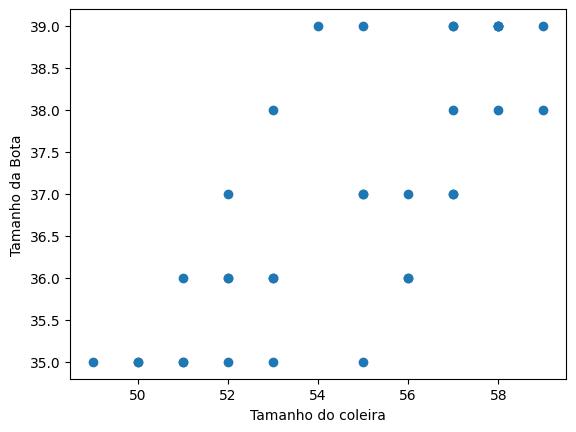

In [9]:
# Carregar e preparar o matplotlib para usar na plotagem de gráficos
import matplotlib.pyplot as plt

# Exibir um gráfico do tamanho do coleira em comparação com o tamanho da bota:
plt.scatter(data_smaller_paws["harness_size"], data_smaller_paws["boot_size"])

# Adicionar rótulos aos eixos
plt.xlabel("Tamanho do coleira")
plt.ylabel("Tamanho da Bota")

# Exibir o gráfico
plt.show()


O gráfico anterior mostra o relacionamento que queremos investigar para nossa loja, mas alguns clientes podem querer as listas de tamanhos de coleira em polegadas, não em centímetros. Como podemos ver esses tamanhos de coleira em unidades imperiais?

Para fazer isso, precisamos criar uma nova coluna chamada harness_size_imperial e usá-la no eixo X.

In [ ]:
# Converter os tamanhos de coleira de unidades métricas para imperiais
# e salvar o resultado em uma nova coluna
data_smaller_paws['harness_size_imperial'] = data_smaller_paws.harness_size / 2.54

# Exibir um gráfico do tamanho do coleira em unidades imperiais
plt.scatter(data_smaller_paws["harness_size_imperial"], data_smaller_paws["boot_size"])
plt.xlabel("Tamanho do coleira (imperial)")
plt.ylabel("Tamanho da Bota")

plt.show()